Matplotlib is building the font cache; this may take a moment.


Files already downloaded and verified
Files already downloaded and verified


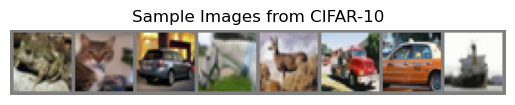

Epoch [1/10], Loss: 2.3038
Epoch [2/10], Loss: 2.2996
Epoch [3/10], Loss: 2.2945
Epoch [4/10], Loss: 2.2898
Epoch [5/10], Loss: 2.2851
Epoch [6/10], Loss: 2.2799
Epoch [7/10], Loss: 2.2747
Epoch [8/10], Loss: 2.2695
Epoch [9/10], Loss: 2.2637
Epoch [10/10], Loss: 2.2570
Finished Training


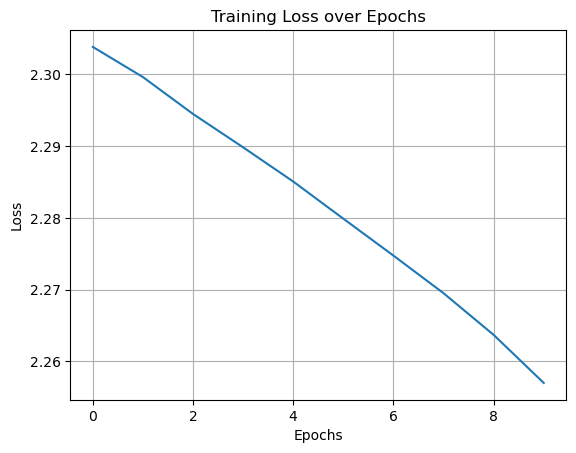

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F  # Import functional API for activation functions

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Select a small subset of the training data
small_trainset_indices = random.sample(range(len(trainset)), 1000)  # Randomly select 1000 samples
small_trainset = torch.utils.data.Subset(trainset, small_trainset_indices)

# Create DataLoader for the small training dataset
trainloader = torch.utils.data.DataLoader(small_trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Visualize some images from the training set
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Get a batch of training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:8]))
plt.title('Sample Images from CIFAR-10')
plt.show()

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize and train the model
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop with loss tracking
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

print("Finished Training")

# Plot training loss
plt.plot(train_losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

Test Accuracy: 0.2580
Classification Report:
              precision    recall  f1-score   support

    airplane       0.67      0.01      0.02      1000
  automobile       0.25      0.46      0.33      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.18      0.56      0.27      1000
         dog       0.42      0.21      0.28      1000
        frog       0.28      0.45      0.35      1000
       horse       0.00      0.00      0.00      1000
        ship       0.30      0.48      0.37      1000
       truck       0.30      0.42      0.35      1000

    accuracy                           0.26     10000
   macro avg       0.24      0.26      0.20     10000
weighted avg       0.24      0.26      0.20     10000



/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


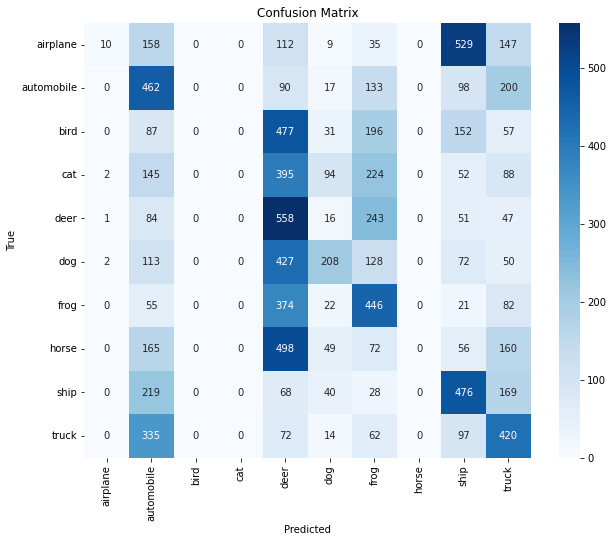

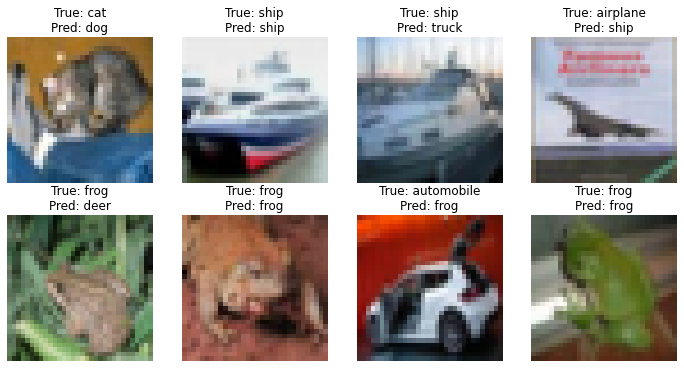

In [14]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluation function for the test dataset
def evaluate_model(model, testloader):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []
    
    with torch.no_grad():  # Disable gradient calculation for testing
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=testset.classes))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=testset.classes, yticklabels=testset.classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Visualize some test predictions
def visualize_predictions(model, testloader):
    model.eval()
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)
    
    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
    
    # Display images with predictions
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        img = images[i].cpu().numpy()
        img = img / 2 + 0.5  # Unnormalize
        img = np.transpose(img, (1, 2, 0))  # Convert to H x W x C
        
        ax.imshow(img)
        ax.set_title(f"True: {testset.classes[labels[i]]}\nPred: {testset.classes[preds[i]]}")
        ax.axis("off")
    plt.show()

# Run the evaluation and visualization functions
evaluate_model(model, testloader)
visualize_predictions(model, testloader)


Fine-tuning Epoch [1/5], Loss: 2.3847
Fine-tuning Epoch [2/5], Loss: 1.5277
Fine-tuning Epoch [3/5], Loss: 1.0455
Fine-tuning Epoch [4/5], Loss: 0.7063
Fine-tuning Epoch [5/5], Loss: 0.4558
Finished Fine-tuning


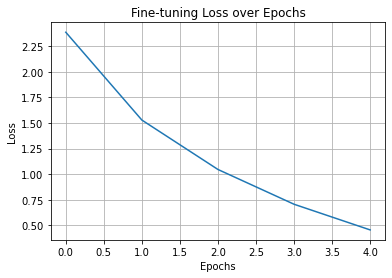

In [13]:
# Part 2: Fine-Tuning a Pre-Trained Model with Visualization
import torchvision.models as models

# Load a pre-trained ResNet model
model_ft = models.resnet18(pretrained=True)

# Modify the final layer to match the number of classes in CIFAR-10
num_classes = 10
model_ft.fc = nn.Linear(model_ft.fc.in_features, num_classes)

# Move the model to the device
model_ft = model_ft.to(device)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Fine-tuning loop with loss tracking
num_epochs_ft = 5
fine_tune_losses = []

for epoch in range(num_epochs_ft):
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer_ft.zero_grad()
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_ft.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(trainloader)
    fine_tune_losses.append(epoch_loss)
    print(f"Fine-tuning Epoch [{epoch + 1}/{num_epochs_ft}], Loss: {epoch_loss:.4f}")

print("Finished Fine-tuning")

# Plot fine-tuning loss
plt.plot(fine_tune_losses)
plt.title('Fine-tuning Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()



Accuracy of Simple CNN on the test dataset: 25.45%
Accuracy of Fine-tuned ResNet on the test dataset: 44.01%
Predictions from Simple CNN:


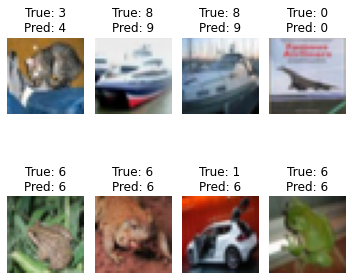

Predictions from Fine-tuned ResNet:


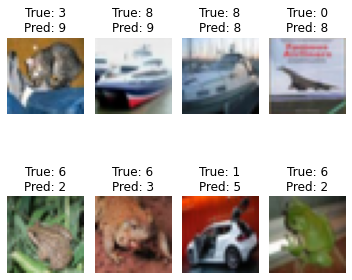

In [11]:
# Model Inferencing for both models
def infer(model, data_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    return all_labels, all_preds

# Run inference on the test dataset for the Simple CNN model
true_labels_cnn, predictions_cnn = infer(model, testloader, device)

# Calculate accuracy for the Simple CNN model
accuracy_cnn = sum(np.array(true_labels_cnn) == np.array(predictions_cnn)) / len(true_labels_cnn)
print(f"Accuracy of Simple CNN on the test dataset: {accuracy_cnn * 100:.2f}%")

# Run inference on the test dataset for the fine-tuned ResNet model
true_labels_resnet, predictions_resnet = infer(model_ft, testloader, device)

# Calculate accuracy for the fine-tuned ResNet model
accuracy_resnet = sum(np.array(true_labels_resnet) == np.array(predictions_resnet)) / len(true_labels_resnet)
print(f"Accuracy of Fine-tuned ResNet on the test dataset: {accuracy_resnet * 100:.2f}%")

# Visualize predictions for Simple CNN
def visualize_predictions(images, true_labels, predictions, num_images=8):
    plt.figure(figsize=(5, 5))  # Large figure size for better resolution
    for i in range(num_images):
        img = images[i] / 2 + 0.5  # unnormalize
        img = np.transpose(img.numpy(), (1, 2, 0))  # Change the order for displaying
        plt.subplot(2, 4, i + 1)
        plt.imshow(img)
        plt.title(f'True: {true_labels[i]}\nPred: {predictions[i]}', fontsize=12)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of test images for Simple CNN
test_dataiter = iter(testloader)
test_images, _ = next(test_dataiter)

# Visualize the predictions for the Simple CNN model
print("Predictions from Simple CNN:")
visualize_predictions(test_images, true_labels_cnn[:8], predictions_cnn[:8])

# Get a batch of test images for Fine-tuned ResNet
test_dataiter_resnet = iter(testloader)
test_images_resnet, _ = next(test_dataiter_resnet)

# Visualize the predictions for the Fine-tuned ResNet model
print("Predictions from Fine-tuned ResNet:")
visualize_predictions(test_images_resnet, true_labels_resnet[:8], predictions_resnet[:8])